In [1]:
from os.path import realpath
import glob
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import join as join

In [2]:

path1 = "/home/luan/Desktop/feijao/Classificacao-main/imagens_cortadas/"
path2 = "/home/luan/Desktop/feijao/Classificacao-main/lote_de_imagens_PDI/"
path3 = "/home/luan/Desktop/feijao/Classificacao-main/projetoPDI"

In [3]:
externo = []
interno = []
imagens_externas = []
imagens_internas = []

In [4]:
print(os.listdir("./imagens_cortadas/"))

['LOTE_EXTERNO_3_R1', 'LOTE_INTERNO_2_R2', 'LOTE_INTERNO_6_R2', 'LOTE_INTERNO_9_R2', 'LOTE_INTERNO_10_R2', 'LOTE_EXTERNO_6_R1', 'LOTE_INTERNO_5_R2', 'LOTE_INTERNO_4_R2', 'LOTE_EXTERNO_2_R1', 'LOTE_EXTERNO_4_R1', 'LOTE_INTERNO_3_R2', 'LOTE_EXTERNO_10_R1', 'LOTE_INTERNO_8_R2', 'LOTE_EXTERNO_9_R1', 'LOTE_EXTERNO_5_R1', 'LOTE_INTERNO_1_R2', 'LOTE_EXTERNO_8_R1']


In [5]:
#['/home/luan/Desktop/feijao/Classificacao-main/imagens', 'cortadas/LOTE', 'EXTERNO', '3', 'R1/LOTE', 'EXTERNO', '3', 'R1', 'semente', '6.jpg']

In [6]:
lower = np.array([94, 20, 2])
upper = np.array([145, 255, 255])


In [7]:
for dic in glob.glob("/home/luan/Desktop/feijao/Classificacao-main/imagens_cortadas/*"):
    for img_path in glob.glob(os.path.join(dic, "*.jpg")):
        label = img_path.split("_")
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        img = cv2.resize(img, (128, 128))

        if(label[5] == 'EXTERNO'):
            imagens_externas.append(np.array(img).reshape(-1))
            externo.append([label[6], 1, label[-1], img_path])
        if(label[5] == 'INTERNO'):
            imagens_internas.append(np.array(img).reshape(-1))
            interno.append([label[6], 2, label[-1], img_path])



In [8]:
print(label)

['/home/luan/Desktop/feijao/Classificacao-main/imagens', 'cortadas/LOTE', 'EXTERNO', '8', 'R1/LOTE', 'EXTERNO', '8', 'R1', 'semente', '34.jpg']


In [9]:
src_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
dst = cv2.Laplacian(src_gray, cv2.CV_16S, ksize=5)
abs_dst = cv2.convertScaleAbs(dst)


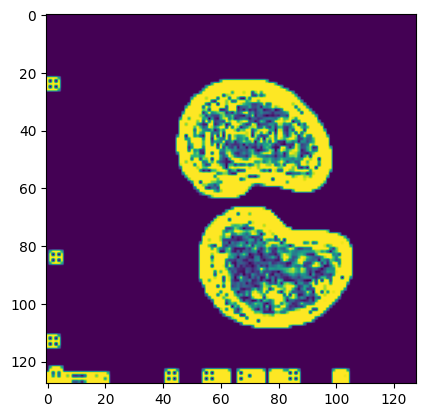

In [10]:
plt.imshow(abs_dst)

In [11]:
imagens_internas

[array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([  0,   0,   0, ...,  95,  87, 100], dtype=uint8),
 array([86, 76, 88, ...,  0,  0,  0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([90, 76, 98, ...,  0,  0,  0], dtype=uint8),
 array([ 0,  0,  0, ..., 86, 82, 94], dtype=uint8),
 array([ 0,  0,  0, ..., 79, 71, 81], dtype=uint8),
 array([74, 72, 82, ...,  0,  0,  0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=

In [12]:
img_interna = pd.DataFrame(imagens_internas)

In [ ]:
img_externas = pd.DataFrame(imagens_externas)

In [34]:
df_path_externo = pd.DataFrame(externo, columns=['LOTE', 'REPETICAO', 'SEMENTE', 'PATH'])

In [36]:
df_path_interno = pd.DataFrame(interno, columns=['LOTE', 'REPETICAO', 'SEMENTE', 'PATH'])

In [38]:
df_path_externo.to_csv('./path_externo.csv', index_label=False)
df_path_interno.to_csv('./path_interno.csv', index_label=False)

In [13]:
img_interna = img_interna/255

In [14]:
img_interna

,0,1,2,3,4,5,6,7,8,9,...,49142,49143,49144,49145,49146,49147,49148,49149,49150,49151
0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.341176,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.372549,0.341176,0.392157
3,0.337255,0.298039,0.345098,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,0.262745,0.223529,0.274510,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
446,0.325490,0.301961,0.345098,0.34902,0.301961,0.372549,0.352941,0.305882,0.372549,0.368627,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
447,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
448,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [15]:
img_externas = pd.DataFrame(imagens_externas)

In [16]:
img_externas = img_externas/255

In [17]:
externo

[['3', 1, '6.jpg'],
 ['3', 1, '27.jpg'],
 ['3', 1, '41.jpg'],
 ['3', 1, '35.jpg'],
 ['3', 1, '38.jpg'],
 ['3', 1, '5.jpg'],
 ['3', 1, '4.jpg'],
 ['3', 1, '37.jpg'],
 ['3', 1, '24.jpg'],
 ['3', 1, '50.jpg'],
 ['3', 1, '17.jpg'],
 ['3', 1, '25.jpg'],
 ['3', 1, '10.jpg'],
 ['3', 1, '33.jpg'],
 ['3', 1, '3.jpg'],
 ['3', 1, '39.jpg'],
 ['3', 1, '13.jpg'],
 ['3', 1, '15.jpg'],
 ['3', 1, '46.jpg'],
 ['3', 1, '48.jpg'],
 ['3', 1, '11.jpg'],
 ['3', 1, '49.jpg'],
 ['3', 1, '12.jpg'],
 ['3', 1, '1.jpg'],
 ['3', 1, '21.jpg'],
 ['3', 1, '31.jpg'],
 ['3', 1, '23.jpg'],
 ['3', 1, '14.jpg'],
 ['3', 1, '18.jpg'],
 ['3', 1, '8.jpg'],
 ['3', 1, '43.jpg'],
 ['3', 1, '26.jpg'],
 ['3', 1, '19.jpg'],
 ['3', 1, '40.jpg'],
 ['3', 1, '9.jpg'],
 ['3', 1, '45.jpg'],
 ['3', 1, '36.jpg'],
 ['3', 1, '2.jpg'],
 ['3', 1, '7.jpg'],
 ['3', 1, '47.jpg'],
 ['3', 1, '32.jpg'],
 ['3', 1, '42.jpg'],
 ['3', 1, '28.jpg'],
 ['3', 1, '22.jpg'],
 ['3', 1, '29.jpg'],
 ['3', 1, '30.jpg'],
 ['3', 1, '44.jpg'],
 ['3', 1, '16.jpg'],
 

In [18]:
externo = pd.DataFrame(externo, columns=['LOTE', 'REPETICAO', 'SEMENTE'])

In [19]:
interno = pd.DataFrame(interno, columns=['LOTE', 'REPETICAO', 'SEMENTE'])

In [20]:
externo = pd.concat([externo, img_externas], axis=1)

In [21]:
interno = pd.concat([interno, img_interna], axis=1)

In [22]:
externo.to_csv('externo.csv', index_label=False)

In [23]:
interno.to_csv('interno.csv', index_label=False)